# Ambition Box

### What We Observed from 500 Companies (Based on Employee-Reported Data)

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import time
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Single page
url = "https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept-Language": "en-US,en;q=0.9"
}

response = requests.get(url, headers=headers)
print(response.status_code)

200


In [208]:
# multipage Extraction 

In [4]:
# Lists to store data
title=[]
rating=[]
c_type=[]
headoffice=[]
operations_spread=[]
job_openings=[]
h_rate=[]
c_rate=[]
reviews=[]


# Loop through 25 pages
for i in range (1,26):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page={i}"
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
        "Accept-Language": "en-US,en;q=0.9"
            }

    page = requests.get(url, headers=headers)
    soup = BeautifulSoup(page.text,"html.parser")
    # time.sleep(1)

    #Titles
    for i in soup.find_all("a",class_="companyCardWrapper__companyName"):
        title.append(i.text.strip())
        
    #Ratings
    for i in soup.find_all("div", class_="rating_star_container"):
        text = i.text.strip()
        if text:
            rating.append(text)
        # else:
        #     rating.append(np.nan)

    # c_type
    for i in soup.find_all("span", class_="companyCardWrapper__interLinking"):  
        text = i.text.strip()
        typ = re.findall(r"(\w.+)\|", text)
        if typ:
            c_type.append(typ[0])
        else:
            c_type.append(np.nan)

    # Head office
    for i in soup.find_all("span", class_="companyCardWrapper__interLinking"):
        text = i.text.strip()
        loc=re.findall(r"(?:\|\s*|^)([A-Za-z\s]+?)(?:\s*/|\s*\+|$)",text) 
        if loc:
            headoffice.append(loc[0])

    # operations_spread
    for i in soup.find_all("span", class_="companyCardWrapper__interLinking"):
        text = i.text.strip()
        loc=re.findall(r"\+(\d+)\s+other\s+locations",text) 
        if loc:
            operations_spread.append(int(loc[0])+1)
        else:
            operations_spread.append(np.nan)

                
    # No of job openings
    for i in soup.find_all("a",class_="companyCardWrapper__ActionWrapper"):
        text=i.text.strip()
        job = re.findall(r"(\S+)\sJobs",text)
        if job:
            job_openings.append(job[0])

    # Highly Rated & Critically rated
    rating_blocks = soup.find_all("div", class_="companyCardWrapper__ratingComparisonWrapper")
    titles_on_page = soup.find_all("a", class_="companyCardWrapper__companyName")
    
    for i in range(len(titles_on_page)):
        if i < len(rating_blocks):
            text = rating_blocks[i].text.strip()
    
            match_high = re.search(r"Highly Rated For (.*?)(?:Critically Rated For|$)", text)
            h_rate.append(match_high.group(1).strip() if match_high else np.nan)
    
            match_crit = re.search(r"Critically Rated For (.*)", text)
            c_rate.append(match_crit.group(1).strip() if match_crit else np.nan)
        else:
            h_rate.append(np.nan)
            c_rate.append(np.nan)


    #Reviews
    for i in soup.find_all("span",class_="companyCardWrapper__companyRatingCount"):  
            text = i.text.strip()
            rev = re.findall(r"\b\d+(?:\.\d+)?k?\b",text) 
            if rev:
                reviews.append(rev[0])
            else:
                reviews.append(np.nan)

In [9]:
# Confirm all columns have equal length
print(f"Titles: {len(title)}")
print(f"Ratings: {len(rating)}")
print(f"Company Type: {len(c_type)}")
print(f"Headoffice: {len(headoffice)}")
print(f"Operations Spread: {len(operations_spread)}")
print(f"Job Openings: {len(job_openings)}")
print(f"Highly Rated: {len(h_rate)}")
print(f"Critically Rated: {len(c_rate)}")
print(f"Reviews: {len(reviews)}")

Titles: 500
Ratings: 500
Company Type: 500
Headoffice: 500
Operations Spread: 500
Job Openings: 500
Highly Rated: 500
Critically Rated: 500
Reviews: 500


In [11]:
import pandas as pd

# Build the DataFrame
df = pd.DataFrame({
    "Company Name": title,
    "Industry Type": c_type,
    "Primary Office Location": headoffice,
    "Operating Locations": operations_spread,
    "Job Openings": job_openings,
    "Total Reviews": reviews,
    "Overall Rating": rating,
    "Highly Rated": h_rate,
    "Critically Rated": c_rate
})


In [13]:
# Quick preview
df.head(5)

,Company Name,Industry Type,Primary Office Location,Operating Locations,Job Openings,Total Reviews,Overall Rating,Highly Rated,Critically Rated
0,TCS,IT Services & Consulting,Bangalore,414,260,98.8k,3.6,"Job Security, Work Life Balance","Promotions / Appraisal, Salary & Benefits, Wor..."
1,Accenture,IT Services & Consulting,Bangalore,229,11k,63.7k,3.7,NaN,"Promotions / Appraisal, Salary & Benefits, Wor..."
2,Wipro,IT Services & Consulting,Bangalore,358,4.9k,57.6k,3.7,Job Security,"Promotions / Appraisal, Salary & Benefits, Wor..."
3,Cognizant,IT Services & Consulting,Hyderabad,213,420,54.7k,3.7,NaN,"Promotions / Appraisal, Salary & Benefits, Wor..."
4,Capgemini,IT Services & Consulting,Bangalore,176,1.7k,46.4k,3.7,"Work Life Balance, Job Security","Promotions / Appraisal, Salary & Benefits"


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Company Name             500 non-null    object
 1   Industry Type            480 non-null    object
 2   Primary Office Location  500 non-null    object
 3   Operating Locations      500 non-null    int64 
 4   Job Openings             500 non-null    object
 5   Total Reviews            500 non-null    object
 6   Overall Rating           500 non-null    object
 7   Highly Rated             352 non-null    object
 8   Critically Rated         387 non-null    object
dtypes: int64(1), object(8)
memory usage: 35.3+ KB


## EDA

In [17]:
#Create new column "Job Security" based on presence of "Job Security" in the "Highly Rated" & "Critically Rated" columns

df["Job Security"] = np.select(
    [
        df["Highly Rated"].str.contains("Job Security", na=False),
        df["Critically Rated"].str.contains("Job Security", na=False)
    ],
    [
        "High",   # Found in Highly Rated 
        "Low"     # Found in Critically Rated 
    ],
    default="Medium"  # Not found in either 
)

In [19]:
#Create new column "Work Life Balance" based on presence of "Work Life Balance" in the "Highly Rated" & "Critically Rated" columns

df["Work Life Balance"] = np.select(
    [
        df["Highly Rated"].str.contains("Work Life Balance", na=False),
        df["Critically Rated"].str.contains("Work Life Balance", na=False)
    ],
    [
        "High",   # Found in Highly Rated 
        "Low"     # Found in Critically Rated 
    ],
    default="Medium"  # Not found in either 
)

In [21]:
#Create new column "Work Satisfaction" based on presence of "Work Satisfaction" in the "Highly Rated" & "Critically Rated" columns

df["Work Satisfaction"] = np.select(
    [
        df["Highly Rated"].str.contains("Work Satisfaction", na=False),
        df["Critically Rated"].str.contains("Work Satisfaction", na=False)
    ],
    [
        "High",   # Found in Highly Rated 
        "Low"     # Found in Critically Rated 
    ],
    default="Medium"  # Not found in either 
)

In [23]:
#Create new column "Promotions" based on presence of "Promotions/Appraisal" in the "Highly Rated" & "Critically Rated" columns

df["Promotions"] = np.select(
    [
        df["Highly Rated"].str.contains("Promotions", na=False),
        df["Critically Rated"].str.contains("Promotions", na=False)
    ],
    [
        "High",   # Found in Highly Rated 
        "Low"     # Found in Critically Rated 
    ],
    default="Medium"  # Not found in either 
)

In [25]:
# Drop unwanted "Highly Rated", "Critically Rated" columns
df = df.drop(columns=["Highly Rated", "Critically Rated"])

In [27]:
# Clean and convert 'Job Openings' and 'Total Reviews':
# Replace '--'/'nan', convert 'k' to numeric, fill NaNs, and cast to int

def clean_column(col):
    col = col.astype(str).replace('--', '0')
    col = col.replace('nan', '0')  # Catch any leftover string NaNs
    return col.apply(lambda x: float(x.replace('k', '')) * 1000 if 'k' in x else float(x))

df['Job Openings'] = clean_column(df['Job Openings']).fillna(0).astype(int)
df['Total Reviews'] = clean_column(df['Total Reviews']).fillna(0).astype(int)

In [29]:
 # Clean whitespace and fill missing values with 'Other'
df['Industry Type'] = df['Industry Type'].astype(str).str.strip().replace('nan', 'Other') 

In [31]:
# Convert 'Overall Rating' column from object to float64 for numerical analysis
df['Overall Rating'] = df['Overall Rating'].astype(float)

In [33]:
# Convert columns to 'category' dtype for memory efficiency and clarity
df[['Industry Type','Primary Office Location', 'Job Security', 'Work Life Balance',	'Work Satisfaction', 'Promotions']] = \
df[['Industry Type','Primary Office Location', 'Job Security', 'Work Life Balance',	'Work Satisfaction', 'Promotions']].astype('category')

In [35]:
ambition = df
ambition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Company Name             500 non-null    object  
 1   Industry Type            500 non-null    category
 2   Primary Office Location  500 non-null    category
 3   Operating Locations      500 non-null    int64   
 4   Job Openings             500 non-null    int32   
 5   Total Reviews            500 non-null    int32   
 6   Overall Rating           500 non-null    float64 
 7   Job Security             500 non-null    category
 8   Work Life Balance        500 non-null    category
 9   Work Satisfaction        500 non-null    category
 10  Promotions               500 non-null    category
dtypes: category(6), float64(1), int32(2), int64(1), object(1)
memory usage: 23.1+ KB


In [37]:
ambition.head(5)

,Company Name,Industry Type,Primary Office Location,Operating Locations,Job Openings,Total Reviews,Overall Rating,Job Security,Work Life Balance,Work Satisfaction,Promotions
0,TCS,IT Services & Consulting,Bangalore,414,260,98800,3.6,High,High,Low,Low
1,Accenture,IT Services & Consulting,Bangalore,229,11000,63700,3.7,Medium,Medium,Low,Low
2,Wipro,IT Services & Consulting,Bangalore,358,4900,57600,3.7,High,Medium,Low,Low
3,Cognizant,IT Services & Consulting,Hyderabad,213,420,54700,3.7,Medium,Medium,Low,Low
4,Capgemini,IT Services & Consulting,Bangalore,176,1700,46400,3.7,High,High,Medium,Low


In [39]:
# Optional: Save it to a CSV
ambition.to_csv("ambitionbox_companies.csv", index=False)
print("DataFrame created and saved as 'ambitionbox_companies.csv'")

DataFrame created and saved as 'ambitionbox_companies.csv'


# Univariate Non Visual Analysis

### Discrete / Category columns

In [43]:
cat_df = ambition.select_dtypes(include=['category'])

In [45]:
cat_df.head()

,Industry Type,Primary Office Location,Job Security,Work Life Balance,Work Satisfaction,Promotions
0,IT Services & Consulting,Bangalore,High,High,Low,Low
1,IT Services & Consulting,Bangalore,Medium,Medium,Low,Low
2,IT Services & Consulting,Bangalore,High,Medium,Low,Low
3,IT Services & Consulting,Hyderabad,Medium,Medium,Low,Low
4,IT Services & Consulting,Bangalore,High,High,Medium,Low


In [47]:
def analyze_categorical(ambition):
    cat_cols = ambition.select_dtypes(include=['category']).columns
    for col in cat_cols:
        print(f"\n {"*"*10}, Categorical Column: {col} ,{"*"*10} ")
        print(f"Count: {ambition[col].count()}")
        print(f"Number of Unique Values: {ambition[col].nunique()}")
        print(f"Most Frequent Value (Mode): {ambition[col].mode().iloc[0]} ({ambition[col].value_counts(normalize=True).iloc[0]*100:.2f}%)")
        print("Top 5 Frequent Values:")
        print(ambition[col].value_counts().head())

In [49]:
analyze_categorical(ambition) 


 **********, Categorical Column: Industry Type ,********** 
Count: 500
Number of Unique Values: 55
Most Frequent Value (Mode): IT Services & Consulting (13.60%)
Top 5 Frequent Values:
Industry Type
IT Services & Consulting    68
Pharma                      27
Banking                     26
Insurance                   26
Internet                    25
Name: count, dtype: int64

 **********, Categorical Column: Primary Office Location ,********** 
Count: 500
Number of Unique Values: 41
Most Frequent Value (Mode): Bangalore (22.20%)
Top 5 Frequent Values:
Primary Office Location
Bangalore    111
Mumbai       103
Pune          57
Chennai       43
Hyderabad     41
Name: count, dtype: int64

 **********, Categorical Column: Job Security ,********** 
Count: 500
Number of Unique Values: 3
Most Frequent Value (Mode): High (44.80%)
Top 5 Frequent Values:
Job Security
High      224
Medium    216
Low        60
Name: count, dtype: int64

 **********, Categorical Column: Work Life Balance ,********

###  What We Observed from 500 Companies (Categorical Insights)

- **IT Services & Consulting** is the top industry (14%), followed by Pharma, Banking, and Insurance—tech and finance dominate the landscape.
- **Bangalore and Mumbai** are the most common office locations, showing India’s major metros continue to lead as corporate hubs.
- **Most companies offer high or medium job security**—over 87% fall in these categories, suggesting overall employee stability.
- **Work-life balance is mostly rated ‘medium’ (54%)**, meaning there’s room to improve flexibility and well-being.
- **Work satisfaction is also largely ‘medium’ (73%)**, showing people are managing—but few are truly thrilled.
- **Low promotions dominate (74%)**, with high promotions almost nonexistent—growth opportunities are limited in most workplaces.


### Contineous / Numerical columns

In [53]:
num_df = ambition.select_dtypes(include='number')

In [55]:
num_df.head()

,Operating Locations,Job Openings,Total Reviews,Overall Rating
0,414,260,98800,3.6
1,229,11000,63700,3.7
2,358,4900,57600,3.7
3,213,420,54700,3.7
4,176,1700,46400,3.7


In [57]:
def analyze_numerical(ambition):
    num_cols = ambition.select_dtypes(include='number').columns
    for col in num_cols:
        print(f"\n--- Numerical Column: {col} ---")
        print(f"Count: {ambition[col].count()}")
        print(f"Minimum: {ambition[col].min()}")
        print(f"Maximum: {ambition[col].max()}")
        print(f"Mean: {ambition[col].mean()}")
        print(f"Median: {ambition[col].median()}")
        print(f"Standard Deviation: {ambition[col].std()}")
        print(f"Variance: {ambition[col].var()}")
        print(f"Skewness: {ambition[col].skew()}")
        print(f"Kurtosis: {ambition[col].kurt()}")

In [59]:
analyze_numerical(ambition)


--- Numerical Column: Operating Locations ---
Count: 500
Minimum: 14
Maximum: 1710
Mean: 207.914
Median: 141.5
Standard Deviation: 222.01979231672277
Variance: 49292.788180360716
Skewness: 2.7403511888644028
Kurtosis: 10.700833304562432

--- Numerical Column: Job Openings ---
Count: 500
Minimum: 0
Maximum: 11000
Mean: 169.52
Median: 33.0
Standard Deviation: 628.6421713177684
Variance: 395190.97955911845
Skewness: 11.969463648032308
Kurtosis: 185.44157124637297

--- Numerical Column: Total Reviews ---
Count: 500
Minimum: 1700
Maximum: 98800
Mean: 5213.8
Median: 2900.0
Standard Deviation: 8455.742944145977
Variance: 71499588.73747447
Skewness: 5.765730384182067
Kurtosis: 43.37801280041012

--- Numerical Column: Overall Rating ---
Count: 500
Minimum: 2.8
Maximum: 4.8
Mean: 3.8486000000000002
Median: 3.9
Standard Deviation: 0.28202325121957045
Variance: 0.07953711422845695
Skewness: -0.2769043015268254
Kurtosis: 0.8587281861904792


### What We Observed from 500 Companies (Numerical Insights)

- **Operating Locations are skewed toward small-scale presence**  
  While some companies have over 1,600 locations, **most operate in fewer than 150**, showing that large networks are rare.

- **Job Openings are heavily right-skewed**  
  With a median of only 33 but a maximum of 16,900, **a few companies dominate hiring activity**, while most are hiring at modest levels.

- **Total Reviews are concentrated in a few companies**  
  Although the average is over 5,000, **most companies receive far fewer reviews**, suggesting that public engagement is limited to a small set of prominent firms.

- **Employee Ratings are stable and centered**  
  Scores mostly range between **3.5 and 4.0**, indicating that **overall satisfaction is moderate to good** across the board—with very few extremes.


## Bivariate Non Visual Analysis

In [63]:
    # Performs non-visual bivariate analysis for all column pairs in the DataFrame.
    # - Num-Num: Shows correlation
    # - Cat-Num Groupby, pivot
    # - Cat-Cat: Crosstab counts

### Numeric–Numeric (Correlation)

In [66]:
num_df.corr()

,Operating Locations,Job Openings,Total Reviews,Overall Rating
Operating Locations,1.000000,0.032504,0.373235,0.156992
Job Openings,0.032504,1.000000,0.484997,-0.078100
Total Reviews,0.373235,0.484997,1.000000,-0.063132
Overall Rating,0.156992,-0.078100,-0.063132,1.000000


### Cat-Num (groupby, pivot table) 

In [69]:
pd.pivot_table(ambition, index='Industry Type',observed=False, columns='Job Security', values='Overall Rating', aggfunc='mean', fill_value=0).head(5)

Job Security,High,Low,Medium
Industry Type,,,
Accounting & Auditing,3.500000,0.0,0.000000
Agro Chemicals,4.100000,0.0,0.000000
Analytics & KPO,3.966667,0.0,3.533333
Auto Components,3.927273,3.6,3.783333
Automobile,4.018182,3.3,4.014286


In [71]:
# Avg. Overall Rating by Industry
ambition.groupby('Industry Type', observed=False)['Overall Rating'].mean().sort_values(ascending=False).head(5)

Industry Type
Non-Profit             4.800000
Jewellery              4.400000
Defence & Aerospace    4.333333
Railways               4.200000
Metals & Mining        4.150000
Name: Overall Rating, dtype: float64

In [73]:
# Example: Crosstab between 'Promotions' and 'Work Satisfaction'
pd.crosstab(ambition['Promotions'], ambition['Work Satisfaction'], margins=True)

Work Satisfaction,High,Low,Medium,All
Promotions,,,,
High,0,0,1,1
Low,8,107,260,375
Medium,9,9,106,124
All,17,116,367,500


In [75]:
ambition[ambition['Promotions']=="High"]

,Company Name,Industry Type,Primary Office Location,Operating Locations,Job Openings,Total Reviews,Overall Rating,Job Security,Work Life Balance,Work Satisfaction,Promotions
120,Manappuram Finance,NBFC,Bangalore,590,3,4800,3.9,Medium,Medium,Medium,High


# Univariate visual analysis

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# For better visuals
# sns.set(style='whitegrid')
# pio.renderers.default = 'notebook'

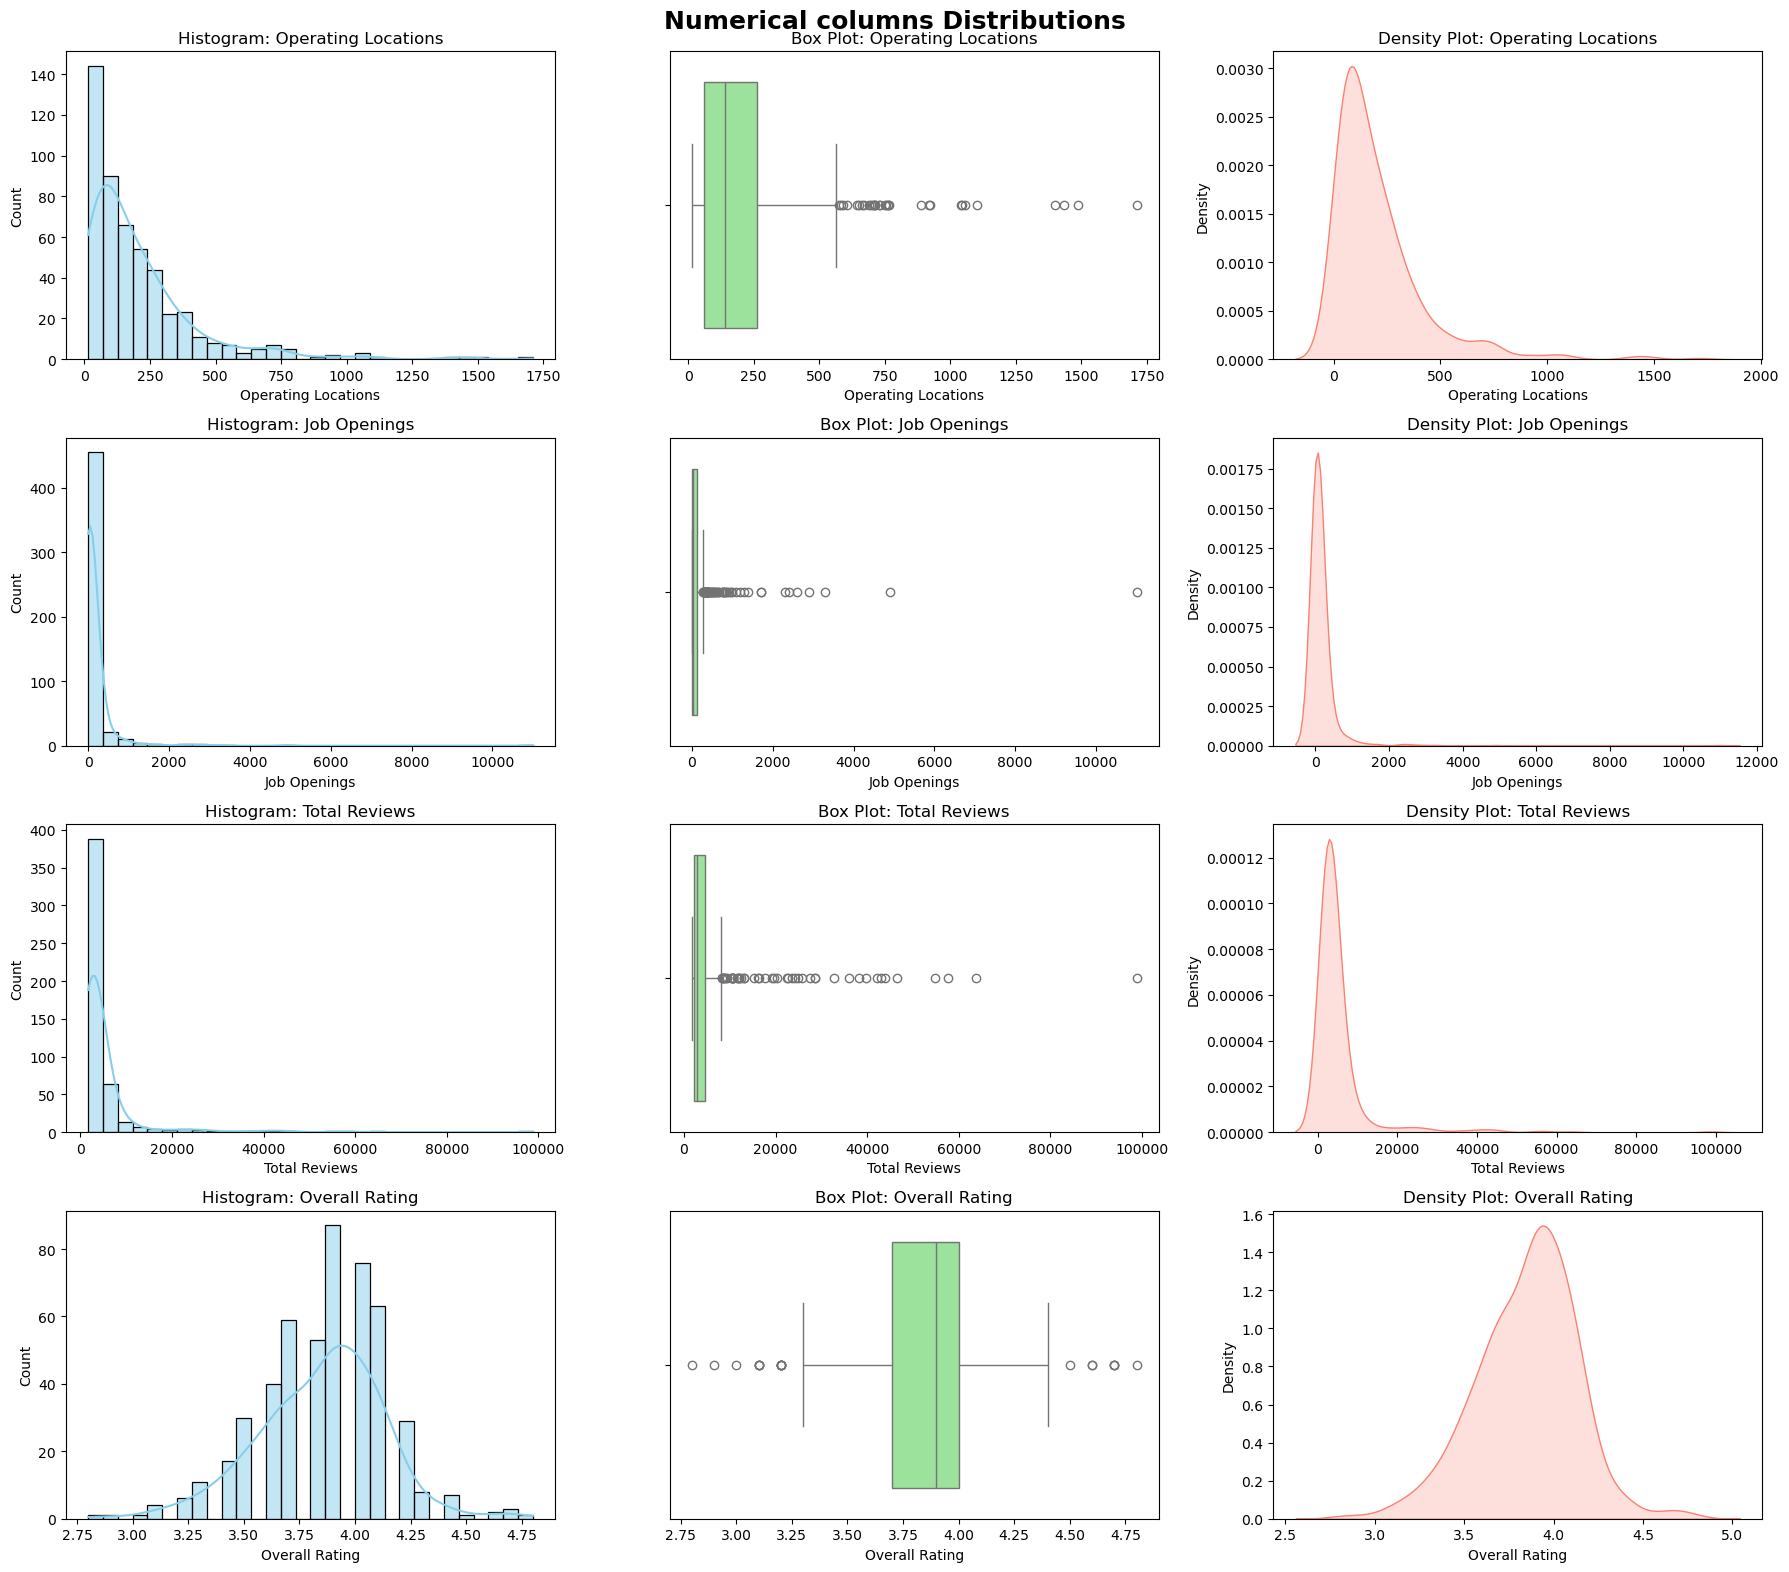

In [79]:
# Select numeric columns
num_cols = ambition.select_dtypes(include='number').columns

# Set up the plot grid
plt.figure(figsize=(18, len(num_cols) * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 3, 3 * (i - 1) + 1)
    sns.histplot(ambition[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram: {col}')

    plt.subplot(len(num_cols), 3, 3 * (i - 1) + 2)
    sns.boxplot(x=ambition[col], color='lightgreen')
    plt.title(f'Box Plot: {col}')

    plt.subplot(len(num_cols), 3, 3 * (i - 1) + 3)
    sns.kdeplot(ambition[col], fill=True, color='salmon')
    plt.title(f'Density Plot: {col}')

plt.suptitle("Numerical columns Distributions", fontsize=18, weight='bold')
plt.tight_layout()
plt.show()

### Key Insights from 500 Compananies Data

- **Most companies have a limited physical presence**  
  The majority operate in just a few locations, showing that regional focus is more common than national or global expansion.

- **Hiring activity is generally modest**  
  Job openings are clustered at the low end—**Only a few companies, specifically one or two, are involved in high-volume recruitment right now.**, making aggressive recruitment a clear outlier.

- **Public visibility varies widely**  
  **A few companies dominate employee reviews.**, suggesting that only a few brands dominate workplace conversations.

- **Employee satisfaction is broadly stable**  
  Most companies have average ratings between **3.5 and 4.0**, showing a general trend of moderate to good satisfaction across the board.


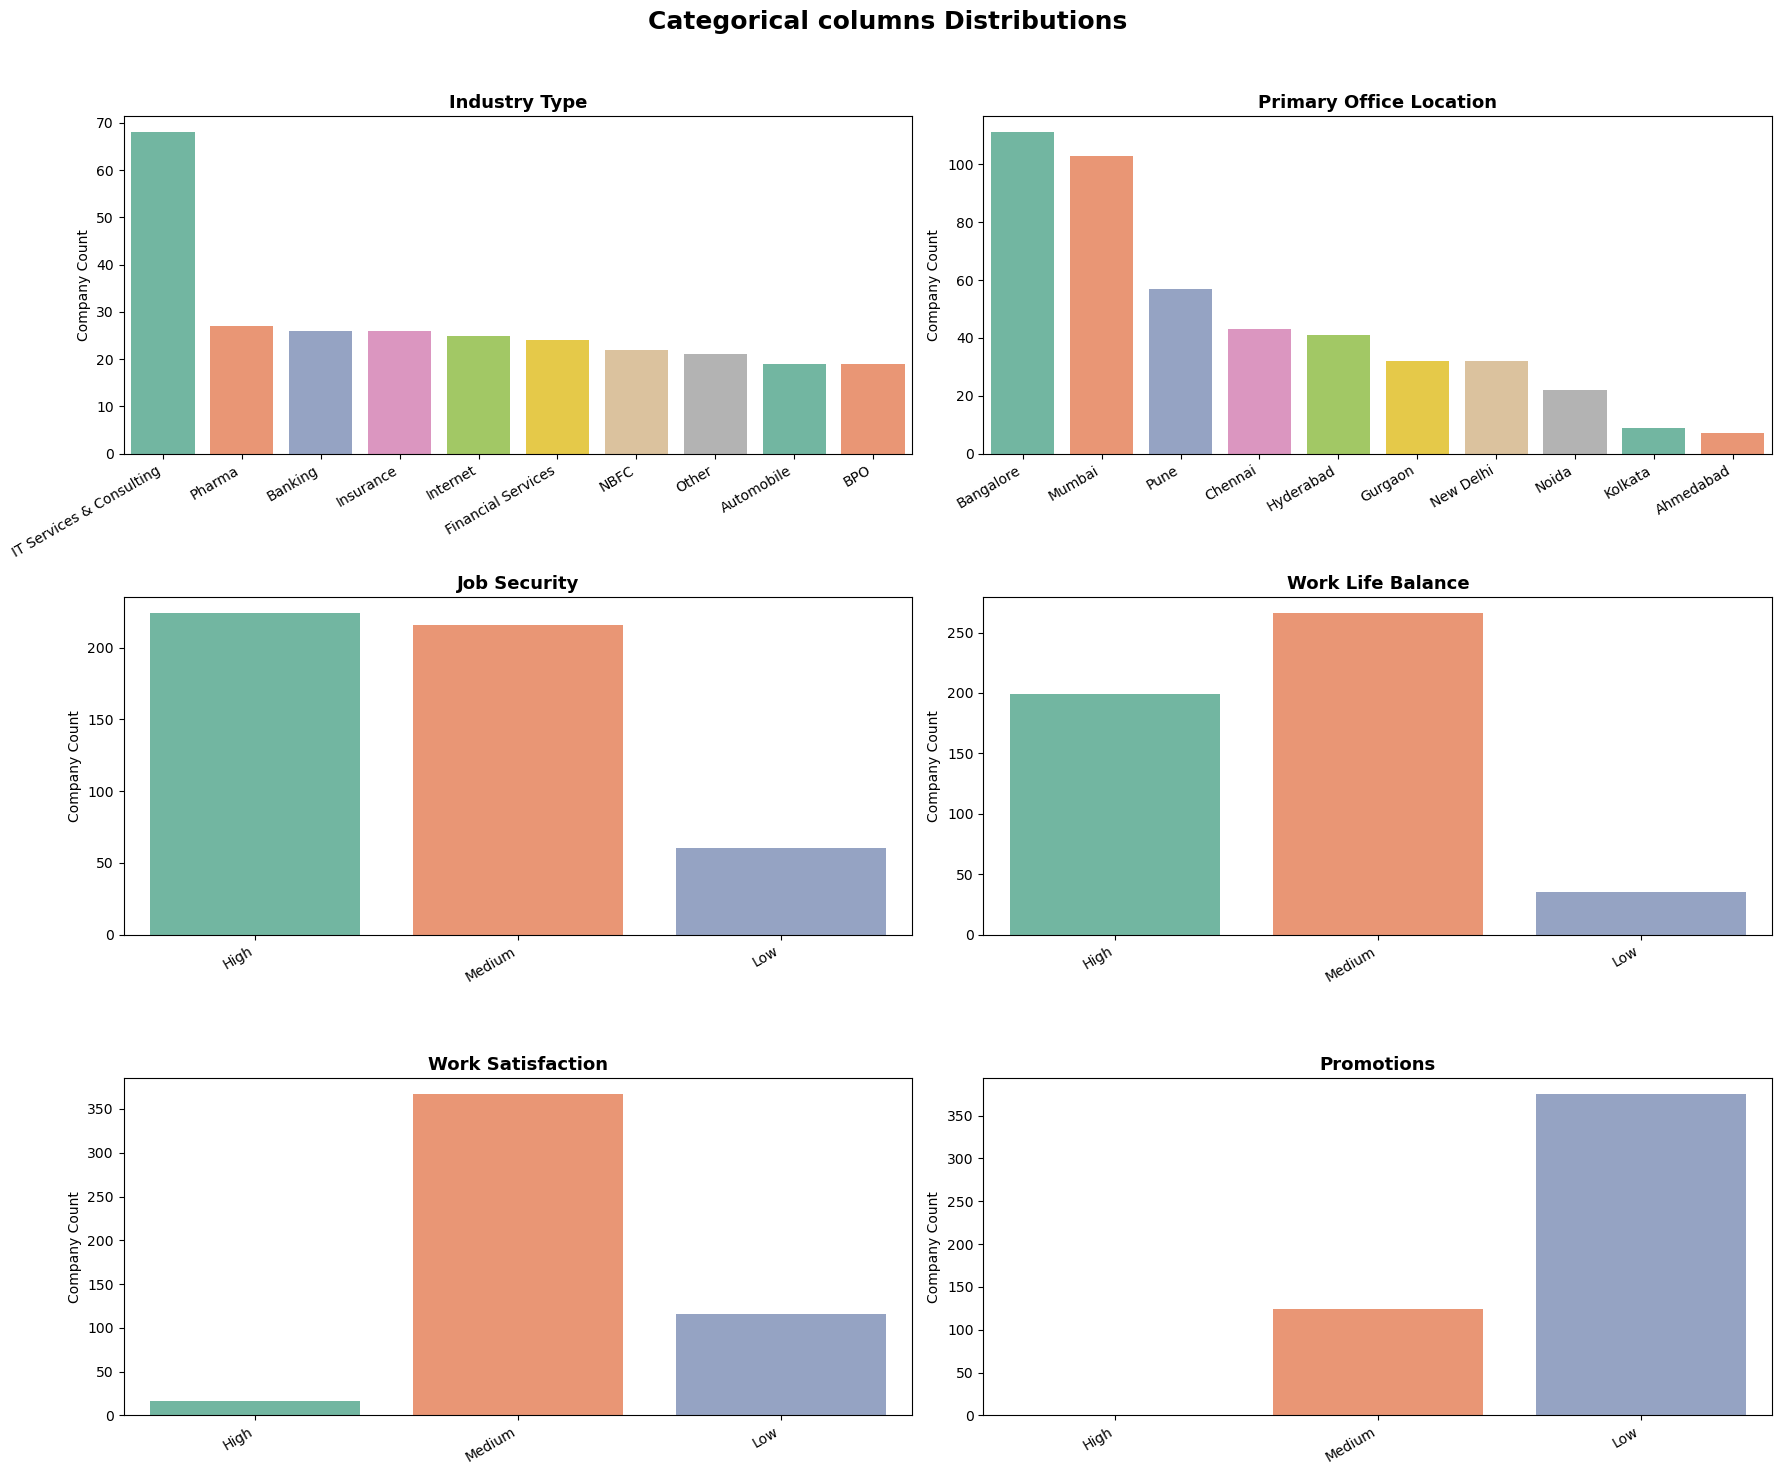

In [81]:
# Relevant categorical columns
cat_cols = [
    'Industry Type',
    'Primary Office Location',
    'Job Security',
    'Work Life Balance',
    'Work Satisfaction',
    'Promotions'
]

# Define ordering for High → Medium → Low
ordinal_order = ['High', 'Medium', 'Low']

# Initialize 3x2 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    ax = axes[i]

    if col in ['Industry Type', 'Primary Office Location']:
        # Show only Top 10
        top_values = ambition[col].value_counts().nlargest(10).index
        plot_data = ambition[ambition[col].isin(top_values)]
        order = top_values
    else:
        plot_data = ambition
        order = ordinal_order  # Apply High→Med→Low order

    sns.countplot(data=plot_data, x=col, order=order, palette='Set2', ax=ax)
    
    ax.set_title(f"{col}", fontsize=13, weight='bold')
    ax.set_ylabel("Company Count")
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

# Clean up extra axes
for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Categorical columns Distributions", fontsize=18, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Key Insights from 500 Compananies Data

- **IT Services & Consulting** stands out as the leading industry, followed by Pharma, Banking, and Insurance—indicating a tech- and finance-heavy corporate sample.
- **Bangalore and Mumbai** dominate as office locations, confirming their role as India’s business powerhouses.
- **Job security is mostly rated as Medium or High**, showing that stability is a strong point across most companies.
- **Work-life balance is largely moderate**, suggesting most firms offer an average level of flexibility.
- **Work satisfaction is mostly “medium”**, pointing to a workforce that’s not unhappy, but rarely fully satisfied.
- **Low promotions are the norm**, with very few companies offering fast-track career growth.


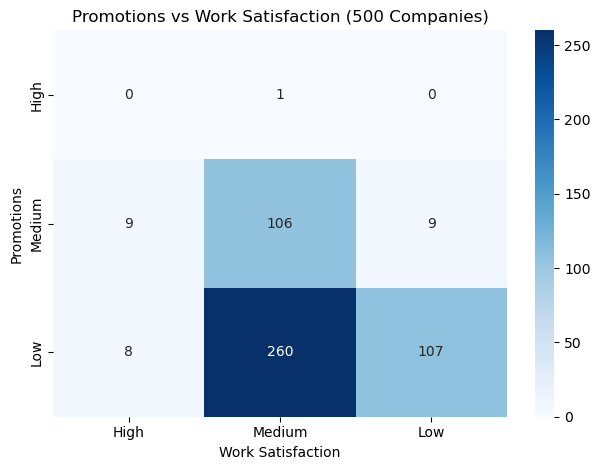

In [83]:
# Do promotions improve job/work satisfaction?

sns.heatmap(pd.crosstab(ambition['Promotions'], ambition['Work Satisfaction'])
            .reindex(index=['High', 'Medium', 'Low'], columns=['High', 'Medium', 'Low']),
            annot=True, fmt='d', cmap='Blues')
plt.title("Promotions vs Work Satisfaction (500 Companies)")
plt.tight_layout()
plt.show()

###  What We Observed from 500 Companies (Based on Employee Feedback)

- In **254 companies**, employees reported **low promotions** but still felt just **okay with their jobs**, meaning promotions help—but they’re not everything.
- In **110 companies**, employees with **low promotions** said they were **unhappy at work**, showing lack of growth can hurt morale.
- **110 companies** with **medium promotions** also had employees who felt **just okay**, suggesting steady growth doesn’t always lead to high satisfaction.
- Only **1 company** had employees report **high levels of promotion**, showing fast growth is rare across the board.
- In **16 companies**, employees felt **very satisfied even with low or medium promotions**, proving that leadership, respect, and work-life balance can be just as powerful as career advancement.

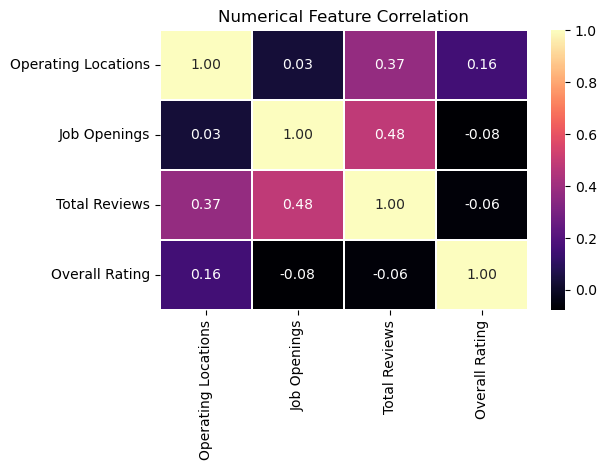

In [85]:
corr = ambition[['Operating Locations', 'Job Openings', 'Total Reviews', 'Overall Rating']].corr()

sns.heatmap(corr, annot=True, cmap='magma', fmt=".2f", linewidths=0.3)
plt.title('Numerical Feature Correlation')
plt.tight_layout()
plt.show()

### **Key Observations from Correlation Analysis**

1. **Job Openings vs Total Reviews → 0.47 (Moderate Positive)**  
   Companies with frequent job openings tend to receive more reviews—indicating that active hiring boosts company visibility and attracts employee feedback.

2. **Operating Locations vs Total Reviews → 0.38 (Moderate Positive)**  
   A larger geographic presence correlates with more reviews, likely due to a broader employee base across multiple locations.

3. **Operating Locations vs Overall Rating → 0.15 (Weak Positive)**  
   Expanding to more locations has minimal influence on overall satisfaction—suggesting company size alone doesn’t drive employee sentiment.

4. **Job Openings vs Overall Rating → -0.03 (Very Weak Negative)**  
   Hiring frequency shows almost no impact on employee ratings—growth phases may not directly affect workplace satisfaction.

5. **Total Reviews vs Overall Rating → -0.06 (Weak Negative)**  
   Higher review volume does not translate to higher satisfaction; more feedback may reflect broader participation rather than better experiences.

6. **Job Openings vs Operating Locations → 0.41 (Moderate Positive)**  
   Companies growing in size also tend to scale their workforce—highlighting synchronized expansion in both physical footprint and hiring.


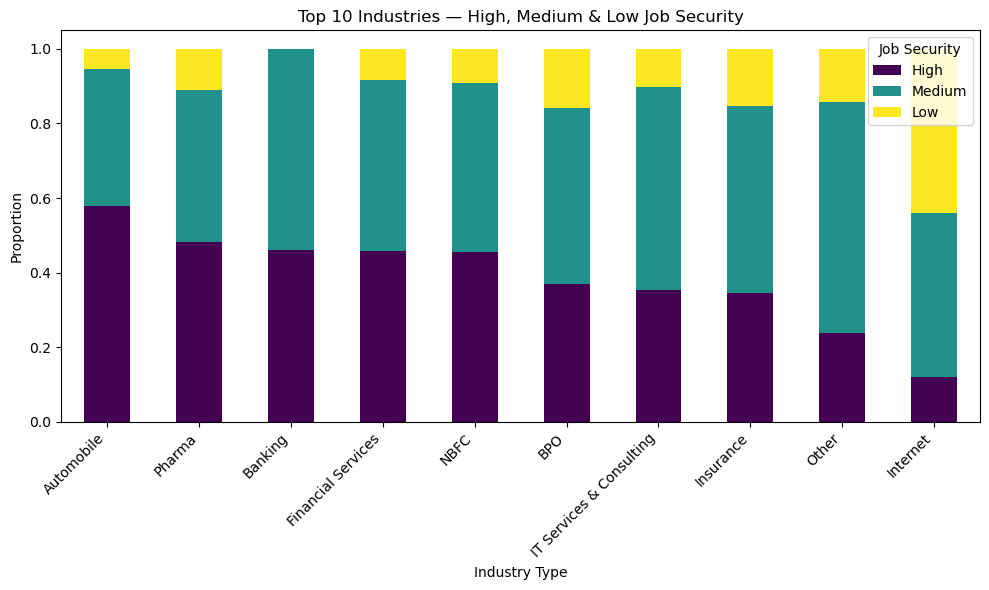

In [87]:
# # Top 10 industries by company count with High, Medium and Low Job Security


# Get the top 10 industries by company count
top10 = ambition['Industry Type'].value_counts().head(10).index

# Create cross-tab with proportion of High and Low job security
job_sec = pd.crosstab(
    ambition['Industry Type'],
    ambition['Job Security'],
    normalize='index'
)[['High','Medium', 'Low']]

# Filter only for top 10 industries
job_sec_top10 = job_sec.loc[top10]

# Sort industries by proportion of High job security
job_sec_top10_sorted = job_sec_top10.sort_values(by='High', ascending=False)

# Plot
job_sec_top10_sorted.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    figsize=(10,6)
)
plt.title('Top 10 Industries — High, Medium & Low Job Security')
plt.ylabel('Proportion')
plt.xlabel('Industry Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [88]:
# Get the top 10 industries by company count
job_sec_top10_sorted

Job Security,High,Medium,Low
Industry Type,,,
Automobile,0.578947,0.368421,0.052632
Pharma,0.481481,0.407407,0.111111
Banking,0.461538,0.538462,0.000000
Financial Services,0.458333,0.458333,0.083333
NBFC,0.454545,0.454545,0.090909
BPO,0.368421,0.473684,0.157895
IT Services & Consulting,0.352941,0.544118,0.102941
Insurance,0.346154,0.500000,0.153846
Other,0.238095,0.619048,0.142857


In [89]:
ambition.head()

,Company Name,Industry Type,Primary Office Location,Operating Locations,Job Openings,Total Reviews,Overall Rating,Job Security,Work Life Balance,Work Satisfaction,Promotions
0,TCS,IT Services & Consulting,Bangalore,414,260,98800,3.6,High,High,Low,Low
1,Accenture,IT Services & Consulting,Bangalore,229,11000,63700,3.7,Medium,Medium,Low,Low
2,Wipro,IT Services & Consulting,Bangalore,358,4900,57600,3.7,High,Medium,Low,Low
3,Cognizant,IT Services & Consulting,Hyderabad,213,420,54700,3.7,Medium,Medium,Low,Low
4,Capgemini,IT Services & Consulting,Bangalore,176,1700,46400,3.7,High,High,Medium,Low


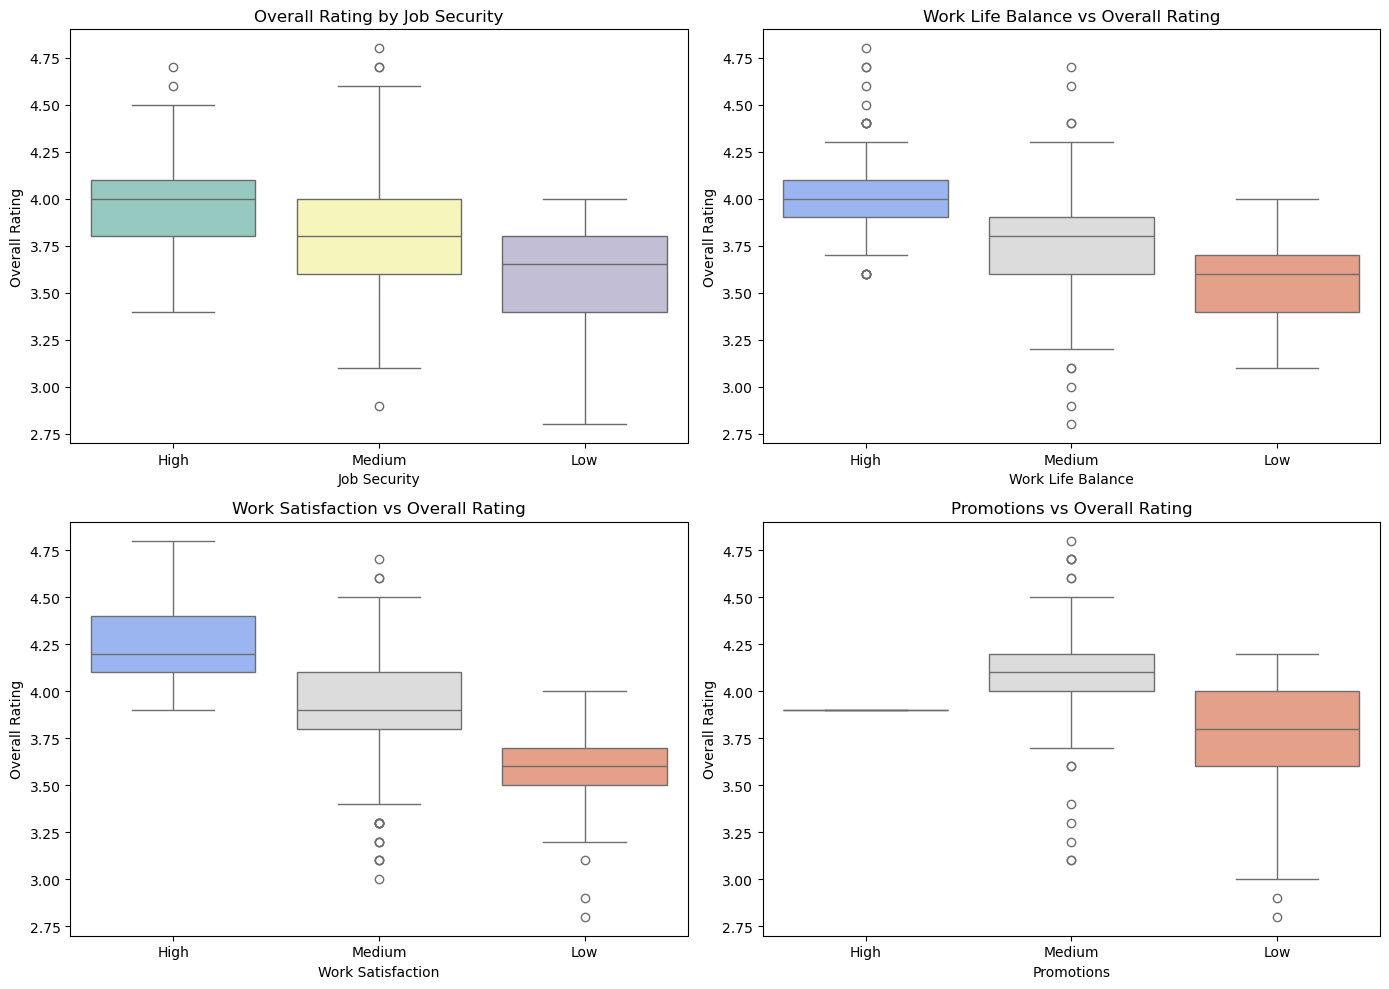

In [91]:
# Desired order for categorical levels
rating_order = ['High', 'Medium', 'Low']

# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Job Security
sns.boxplot(data=ambition, x='Job Security', y='Overall Rating',
            order=rating_order, palette='Set3', ax=axes[0, 0])
axes[0, 0].set_title('Overall Rating by Job Security')

# Plot 2: Work Life Balance
sns.boxplot(data=ambition, x='Work Life Balance', y='Overall Rating',
            order=rating_order, palette='coolwarm', ax=axes[0, 1])
axes[0, 1].set_title('Work Life Balance vs Overall Rating')

# Plot 3: Work Satisfaction
sns.boxplot(data=ambition, x='Work Satisfaction', y='Overall Rating',
            order=rating_order, palette='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Work Satisfaction vs Overall Rating')

# Plot 4: Promotions
sns.boxplot(data=ambition, x='Promotions', y='Overall Rating',
            order=rating_order, palette='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Promotions vs Overall Rating')

plt.tight_layout()
plt.show()


1. Job Security vs Overall Rating


Companies rated High on Job Security tend to have higher median ratings and fewer extreme outliers.

Those with Low Job Security show more spread and lower consistency in satisfaction.

Insight: Job security plays a stable and positive role in shaping employee satisfaction.


2. Work-Life Balance vs Overall Rating


A clear upward trend from Low → Medium → High.

Companies with High work-life balance show higher and more consistent ratings.

Insight: Work-life balance is a strong predictor of employee happiness.


3. Work Satisfaction vs Overall Rating

   
This has the widest spread, especially for Low and Medium satisfaction levels.

The rating improves notably only in the High satisfaction group.

Insight: When satisfaction is High, it significantly boosts perception — but Low to Medium ranges show mixed reactions.

4. Promotions vs Overall Rating

   
Ratings are surprisingly low and tightly packed for all categories.

Even companies with High ratings on promotions don’t show a sharp rise in overall rating.

Insight: Promotions alone don’t guarantee employee satisfaction unless coupled with other positive culture factors.

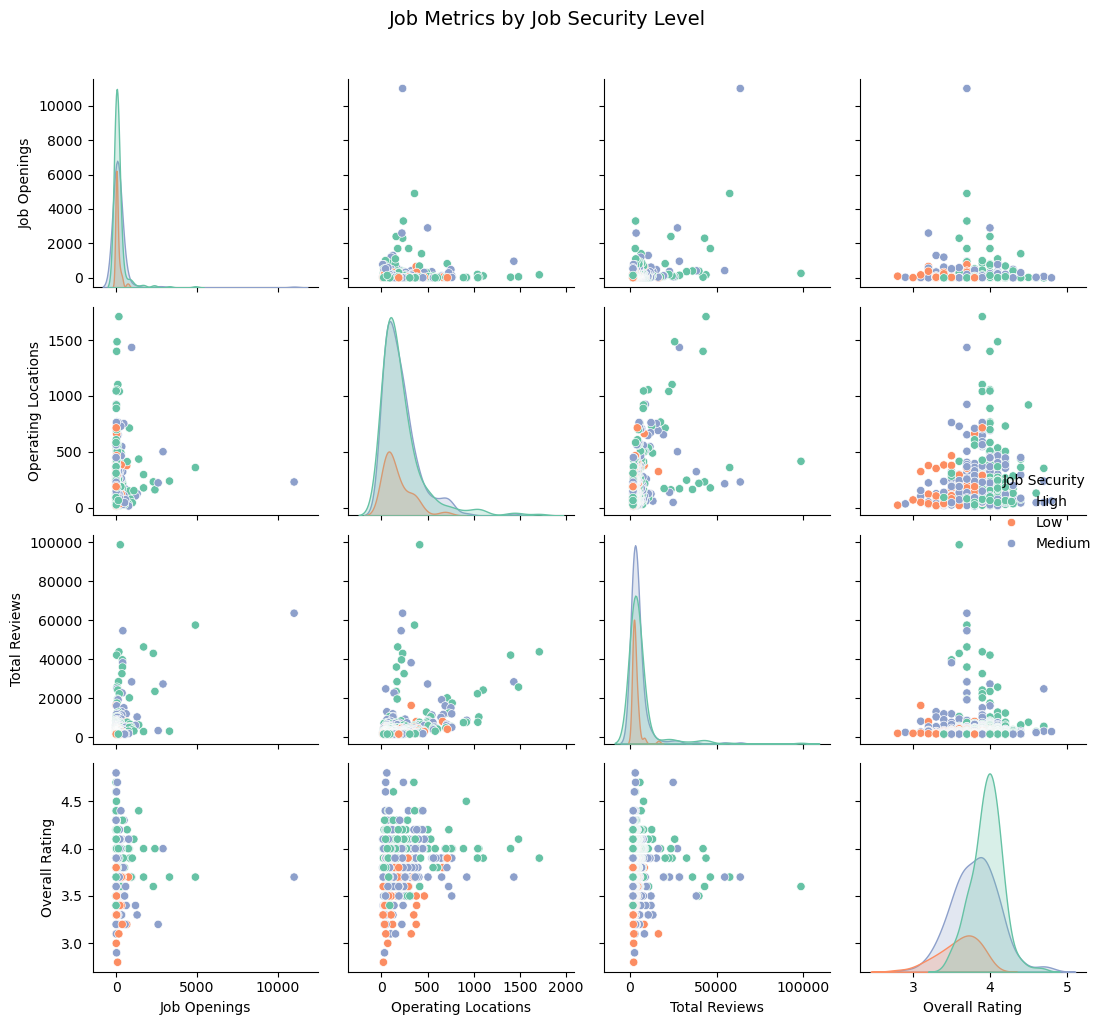

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Job Security' to categorical if needed
ambition['Job Security'] = ambition['Job Security'].astype('category')

# Compact pairplot of key metrics colored by job security
sns.pairplot(
    ambition,
    vars=['Job Openings', 'Operating Locations', 'Total Reviews', 'Overall Rating'],
    hue='Job Security',
    palette='Set2',         # Visually distinct color scheme
    diag_kind='kde'         # Smooth curve on diagonal histograms
)

# Add title to the entire grid
plt.suptitle('Job Metrics by Job Security Level', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

Top Numerical Features


These show strong patterns, variation, or correlation:

Job Openings High variance, strong right skew. Useful to identify fast-growing or mass-hiring companies.

Total Reviews Correlates with job openings. Suggests active employee engagement or larger employee bases.

Overall Rating Key for benchmarking quality of work culture; links well with multiple categorical dimensions.

### Top 10 Companies with Most Job Openings

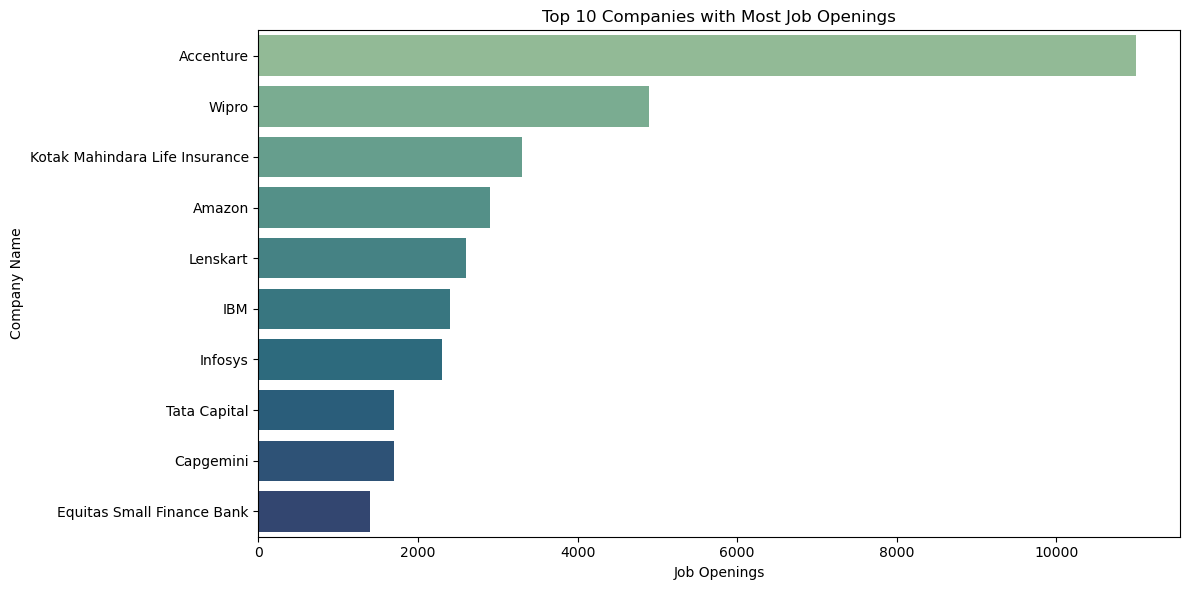

In [96]:
#10 comanies with high ob opening
top10_openings = ambition[["Company Name", "Job Openings"]].sort_values(by="Job Openings", ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top10_openings, y="Company Name", x="Job Openings", palette="crest")
plt.title("Top 10 Companies with Most Job Openings")
plt.xlabel("Job Openings")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()

key insights from your bar chart showcasing the top 10 companies with the most job openings:

Accenture leads hiring — a clear signal of rapid tech consulting expansion.

Wipro follows, but with far fewer openings — showing a more measured approach.

Diverse industries like banking, e-commerce, and logistics are actively hiring.

Even mid-sized players like Sodexo and Tata Capital are scaling up — opportunity is widespread.

### Top 10 Industries by Total Job Openings

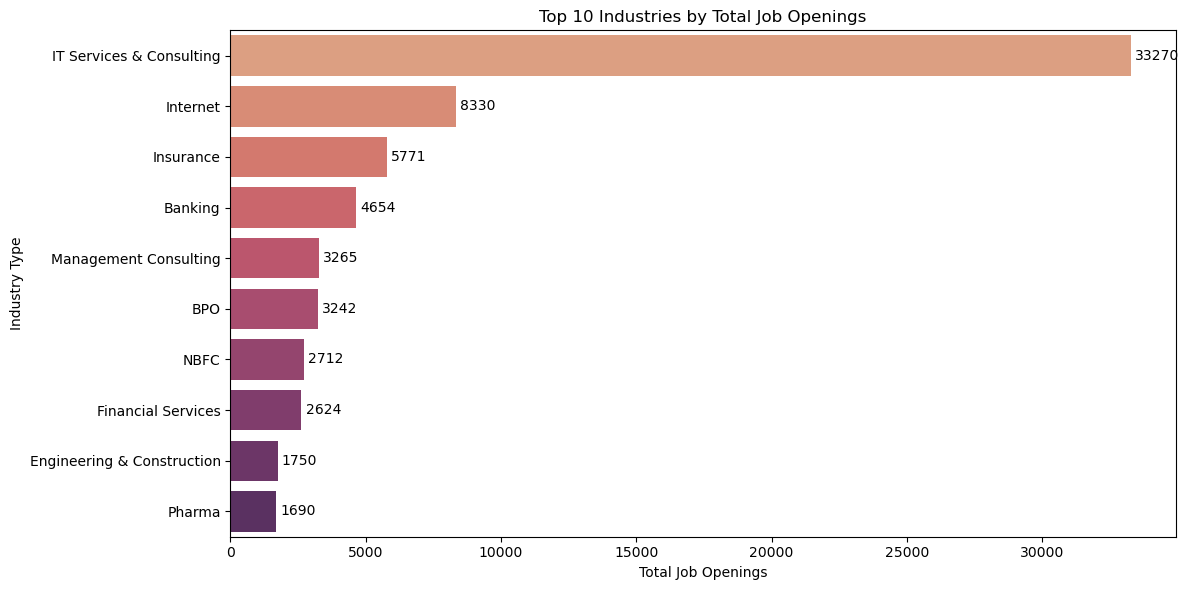

In [113]:
# Group by industry and sort by total job openings top 10
ambition = pd.read_csv("ambitionbox_companies.csv")
top10_industries = (
    ambition.groupby("Industry Type")["Job Openings"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top10_industries, y="Industry Type", x="Job Openings", palette="flare")

# Add value labels on bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.0f', label_type='edge', padding=3)

plt.title("Top 10 Industries by Total Job Openings")
plt.xlabel("Total Job Openings")
plt.ylabel("Industry Type")
plt.tight_layout()
plt.show()

IT Services & Consulting dominates hiring with massive demand.

Insurance and Internet sectors are tied for second — strong digital and financial momentum.

Finance-related sectors like Banking and NBFC show solid job volumes.

Healthcare and Engineering round out the top 10 — highlighting growth in wellness and infrastructure.

### Top 10 IT Services & Consulting Companies by Job Openings

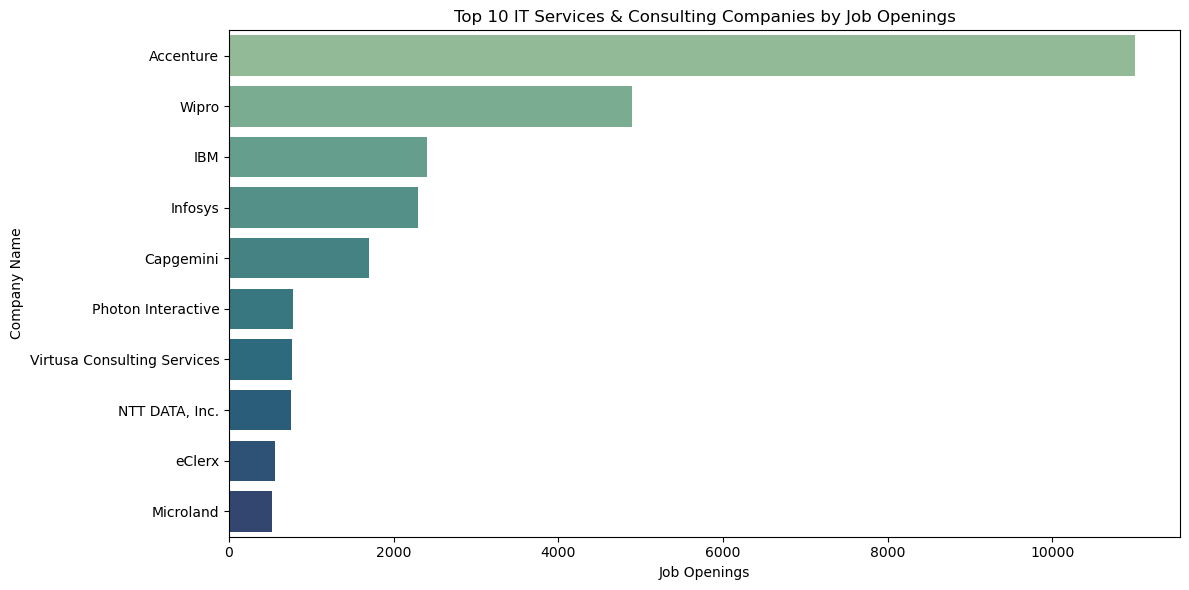

In [115]:
# Filter IT Services & Consulting companies
it_df = ambition[ambition["Industry Type"] == "IT Services & Consulting"]

# Top 10 by job openings
top10_openings_it = (
    it_df[["Company Name", "Job Openings"]]
    .sort_values(by="Job Openings", ascending=False)
    .drop_duplicates("Company Name")
    .head(10)
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top10_openings_it, x="Job Openings", y="Company Name", palette="crest")

plt.title("Top 10 IT Services & Consulting Companies by Job Openings")
plt.xlabel("Job Openings")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()

Accenture dominates hiring in IT Services & Consulting.

Wipro and IBM follow but with notably fewer openings.

Mid-sized firms like Photon and Virtusa show strong hiring presence.

Talent demand is widespread, spanning global giants and niche players.

### Top 10 Companies with max overall rating

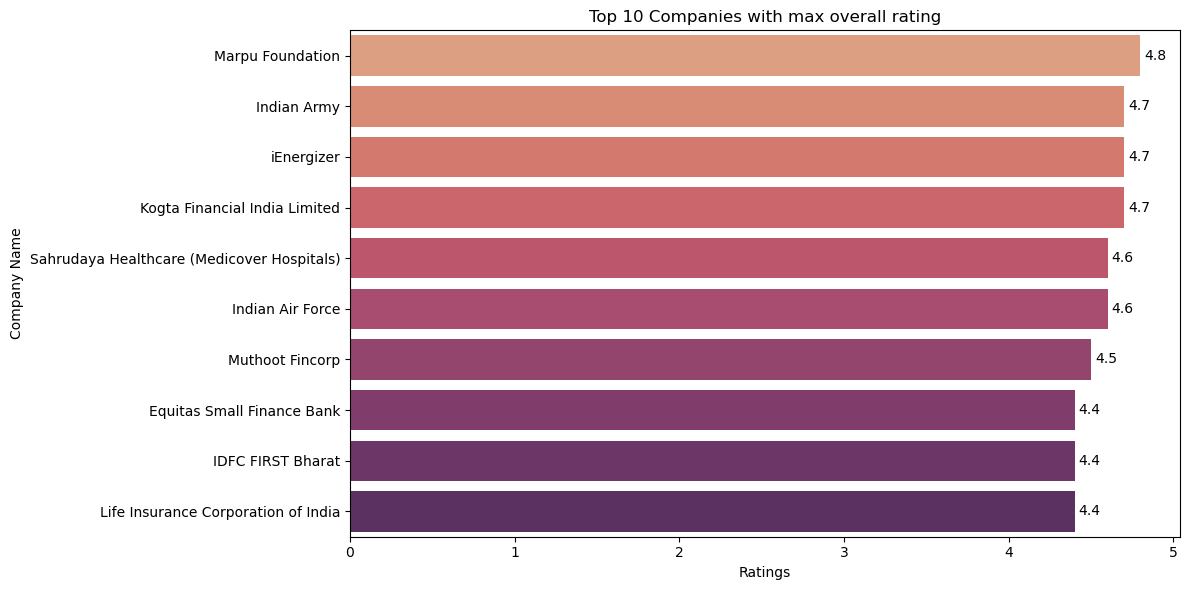

In [117]:
top10_companies=ambition.groupby("Company Name")["Overall Rating"].max().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,6))
ax1 = sns.barplot(data=top10_companies, y="Company Name", x="Overall Rating", palette="flare")
for container in ax1.containers:
    labels = [f"{bar.get_width():.1f}" for bar in container]
    ax1.bar_label(container, labels=labels, label_type="edge", padding=3)

plt.title("Top 10 Companies with max overall rating")
plt.xlabel("Ratings")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()

Top 10 Companies by Overall Rating:

Marpu Foundation tops the list with an impressive 4.8 rating.

Indian Army and Indian Air Force rank high, reflecting strong employee sentiment in defense.

iEnergizer and Kogta Financial show private firms can also earn excellent reviews.

A mix of sectors — from healthcare to banking — suggests great workplaces span across industries.

### Top 10 Industries with max overall rating

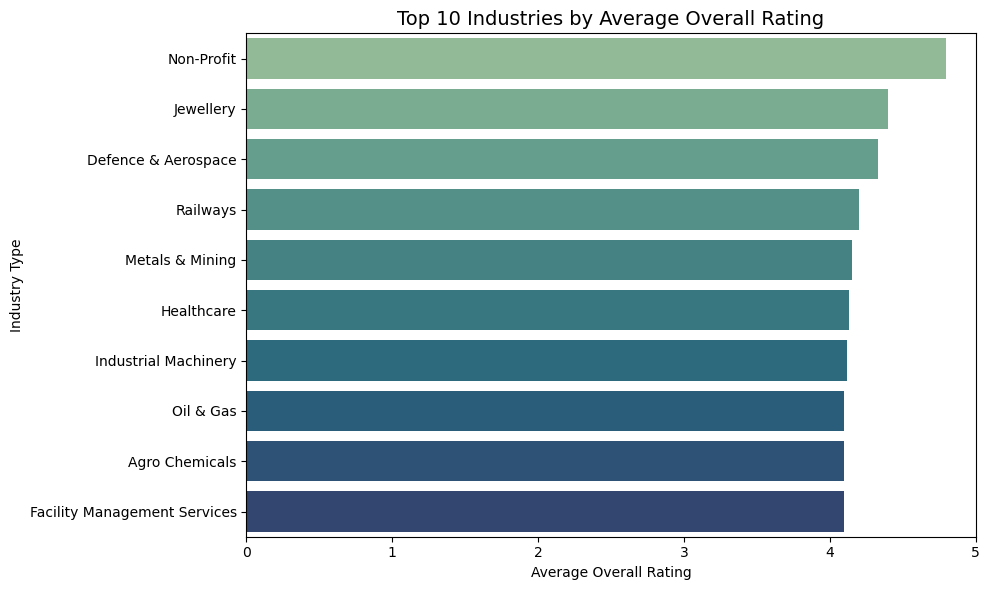

In [119]:
# Step 1: Group by Industry Type and compute average rating
top_industries = (
    ambition.groupby('Industry Type')['Overall Rating']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Step 2: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_industries,
    x='Overall Rating',
    y='Industry Type',
    palette='crest'  # visually appealing and smooth gradient
)

# Final touches
plt.title("Top 10 Industries by Average Overall Rating", fontsize=14)
plt.xlabel("Average Overall Rating")
plt.ylabel("Industry Type")
plt.xlim(0, 5)  # Ratings are on a 0–5 scale
plt.tight_layout()
plt.show()

### Top Hiring Company in Each of the Top 10 Industries

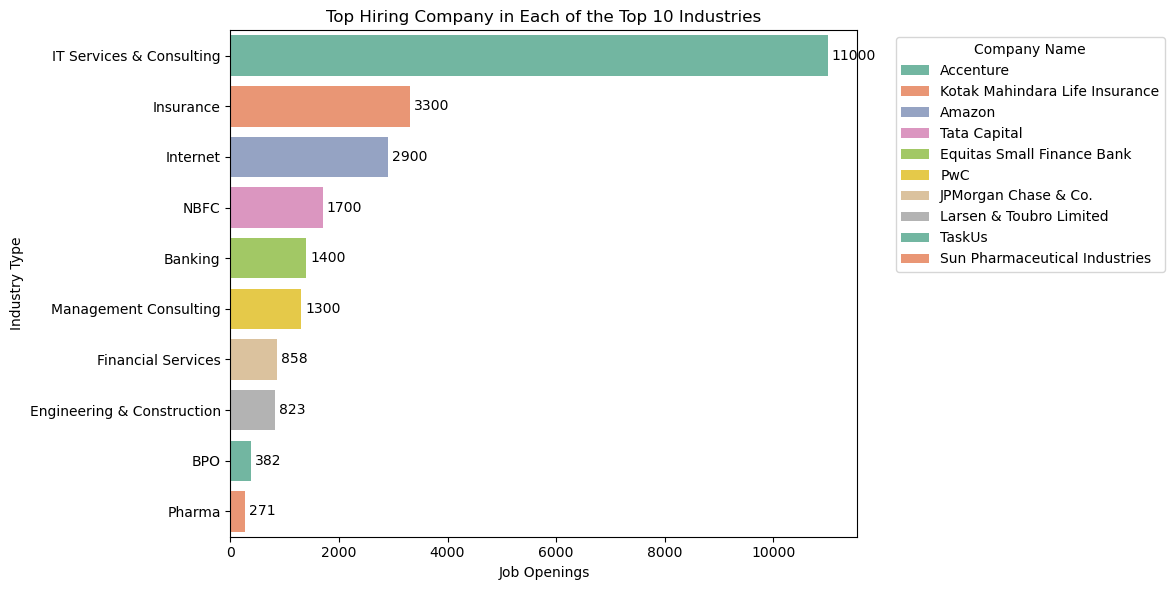

In [121]:
# Step 1: Identify top 10 industries by total job openings
top10_industries = (
    ambition.groupby("Industry Type", observed=True)["Job Openings"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Step 2: Filter dataset to only include those industries
filtered_df = ambition[ambition["Industry Type"].isin(top10_industries)]

# Step 3: For each of the top industries, get the company with max job openings
top_companies_in_industries = (
    filtered_df.loc[
        filtered_df.groupby("Industry Type", observed=True)["Job Openings"].idxmax()
    ]
    .sort_values("Job Openings", ascending=False)
)

# Step 4: Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=top_companies_in_industries,
    y="Industry Type",
    x="Job Openings",
    hue="Company Name",
    dodge=False,
    palette="Set2"
)

# Step 5: Label all bars with counts
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Final plot styling
plt.title("Top Hiring Company in Each of the Top 10 Industries")
plt.xlabel("Job Openings")
plt.ylabel("Industry Type")
plt.legend(title="Company Name", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Accenture leads hiring in IT Services with 17.4K+ openings.

Amazon, Cognizant, and Kotak top hiring in Internet, Consulting, and Insurance sectors.

Banking, Pharma, and NBFCs also show strong demand, beyond core tech.

Hiring is concentrated among a few dominant firms in each industry.

### Top 10 Industry by Total Reviews

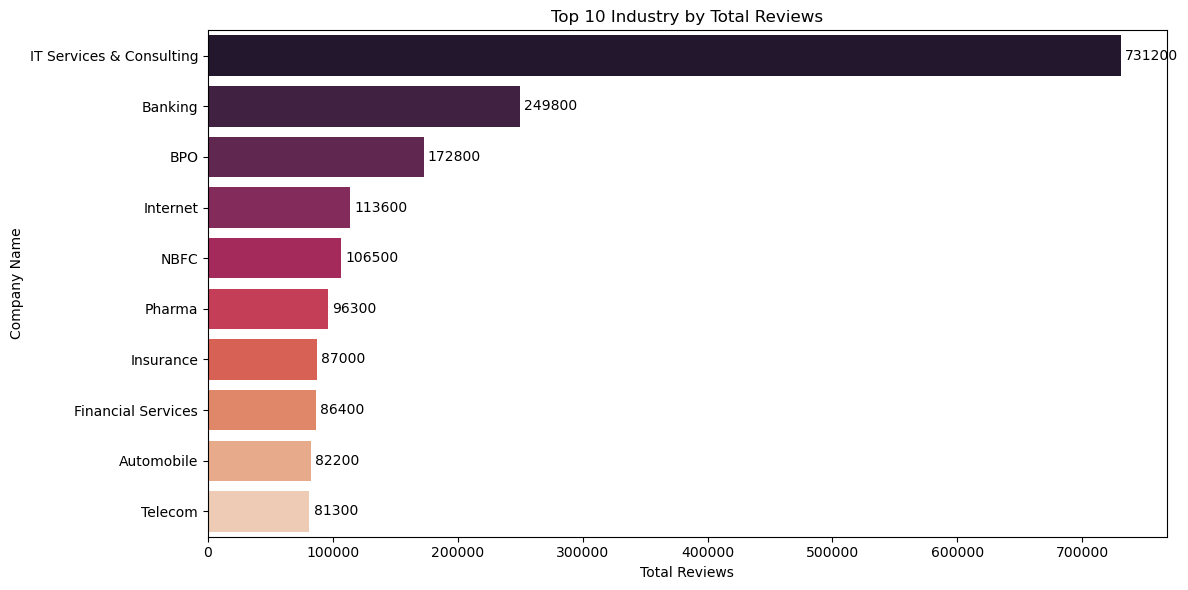

,Industry Type,Total Reviews
0,IT Services & Consulting,731200
1,Banking,249800
2,BPO,172800
3,Internet,113600
4,NBFC,106500
5,Pharma,96300
6,Insurance,87000
7,Financial Services,86400
8,Automobile,82200
9,Telecom,81300


In [123]:
# Get top 10 companies by total reviews
top10_reviews = (
    ambition.groupby("Industry Type")["Total Reviews"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Plot
plt.figure(figsize=(12,6))
ax = sns.barplot(data=top10_reviews, y="Industry Type", x="Total Reviews", palette="rocket")

# Annotate bars with review counts
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3, label_type="edge")

plt.title("Top 10 Industry by Total Reviews")
plt.xlabel("Total Reviews")
plt.ylabel("Company Name")
plt.tight_layout()
plt.show()
top10_reviews

### High Job Security in Top 10 Industries

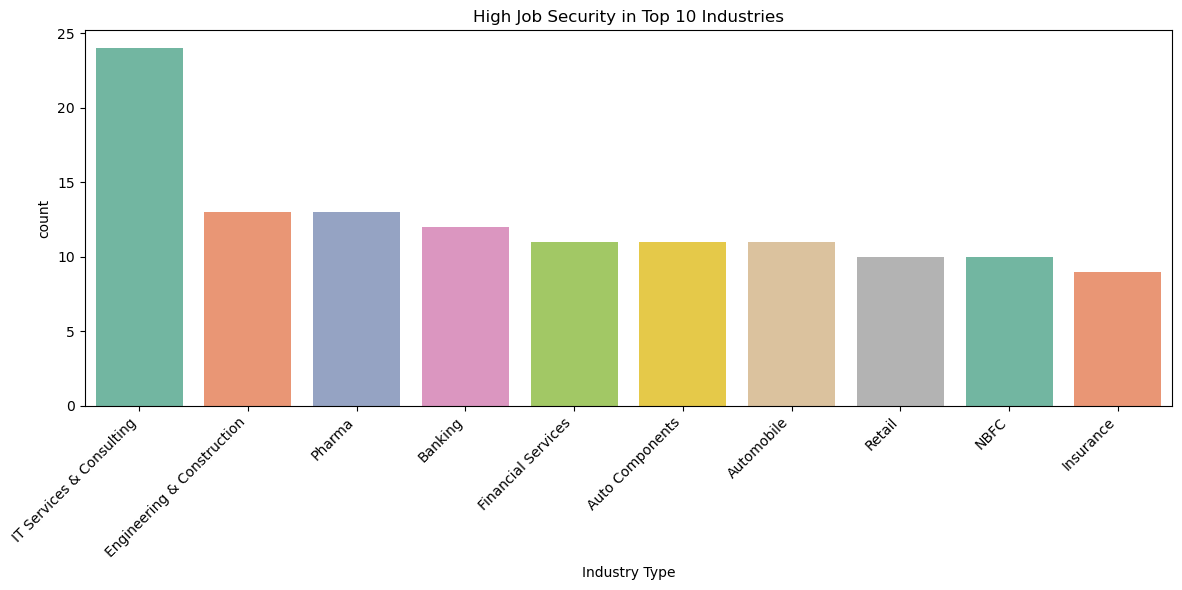

In [125]:
#Filter High Job Security
high_df = ambition[ambition['Job Security'] == 'High']

#Get top 10 industry types
top10 = high_df['Industry Type'].value_counts().index[:10]

#Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=high_df, x='Industry Type', order=top10, palette='Set2')
plt.title('High Job Security in Top 10 Industries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Qualitative Workplace Ratings Heatmap

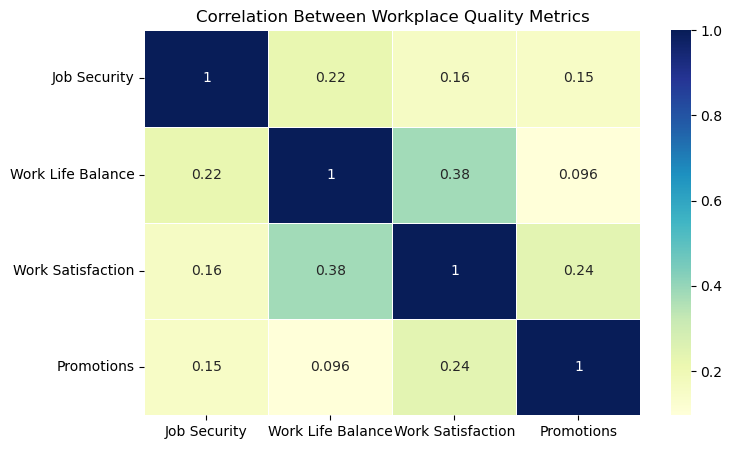

In [127]:
# Map High=3, Medium=2, Low=1
rating_map = {'High': 3, 'Medium': 2, 'Low': 1}
df_mapped = df[['Job Security', 'Work Life Balance', 'Work Satisfaction', 'Promotions']].replace(rating_map)

plt.figure(figsize=(8, 5))
sns.heatmap(df_mapped.corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Between Workplace Quality Metrics")
plt.show()

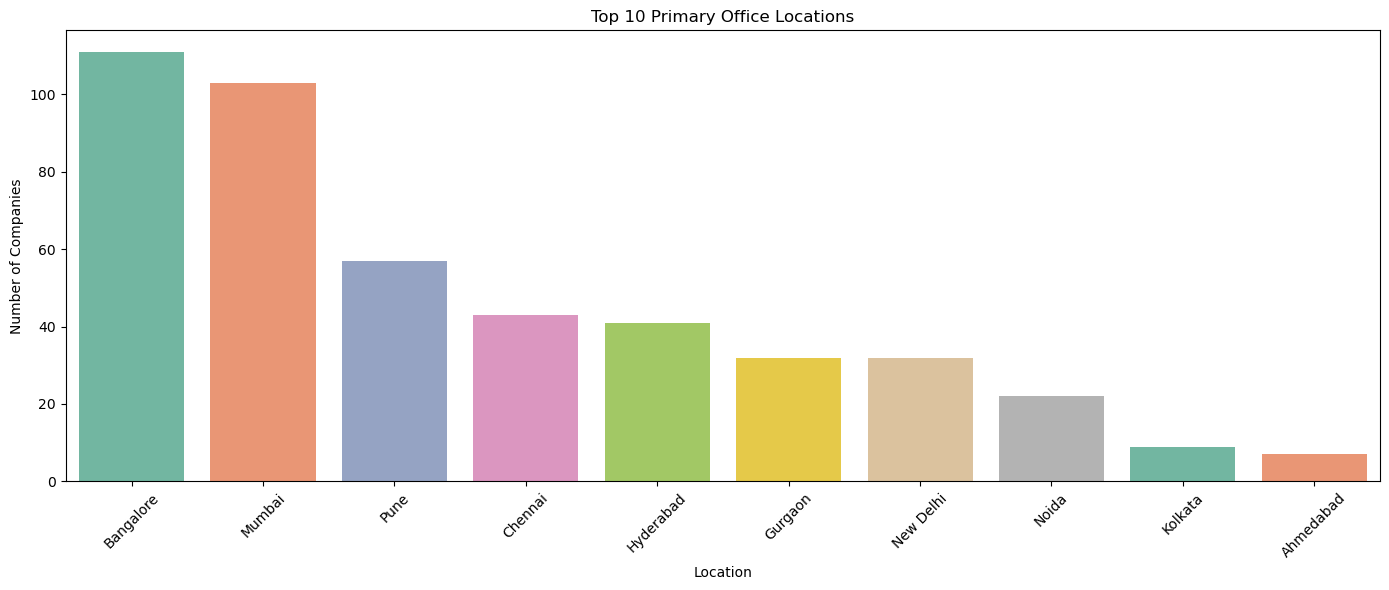

In [129]:

# Get top 10 locations
top_locations = ambition['Primary Office Location'].value_counts().head(10)

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette="Set2")
plt.title("Top 10 Primary Office Locations")
plt.xlabel("Location")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Metro tech hubs** — A majority of top companies are clustered in Bangalore, Mumbai, Pune, Chennai and Hyderabad.

**Hiring Hotspots** — Job seekers benefit most in these metro hiring hotspots.

### Distribution of Companies with Each Workplace Category

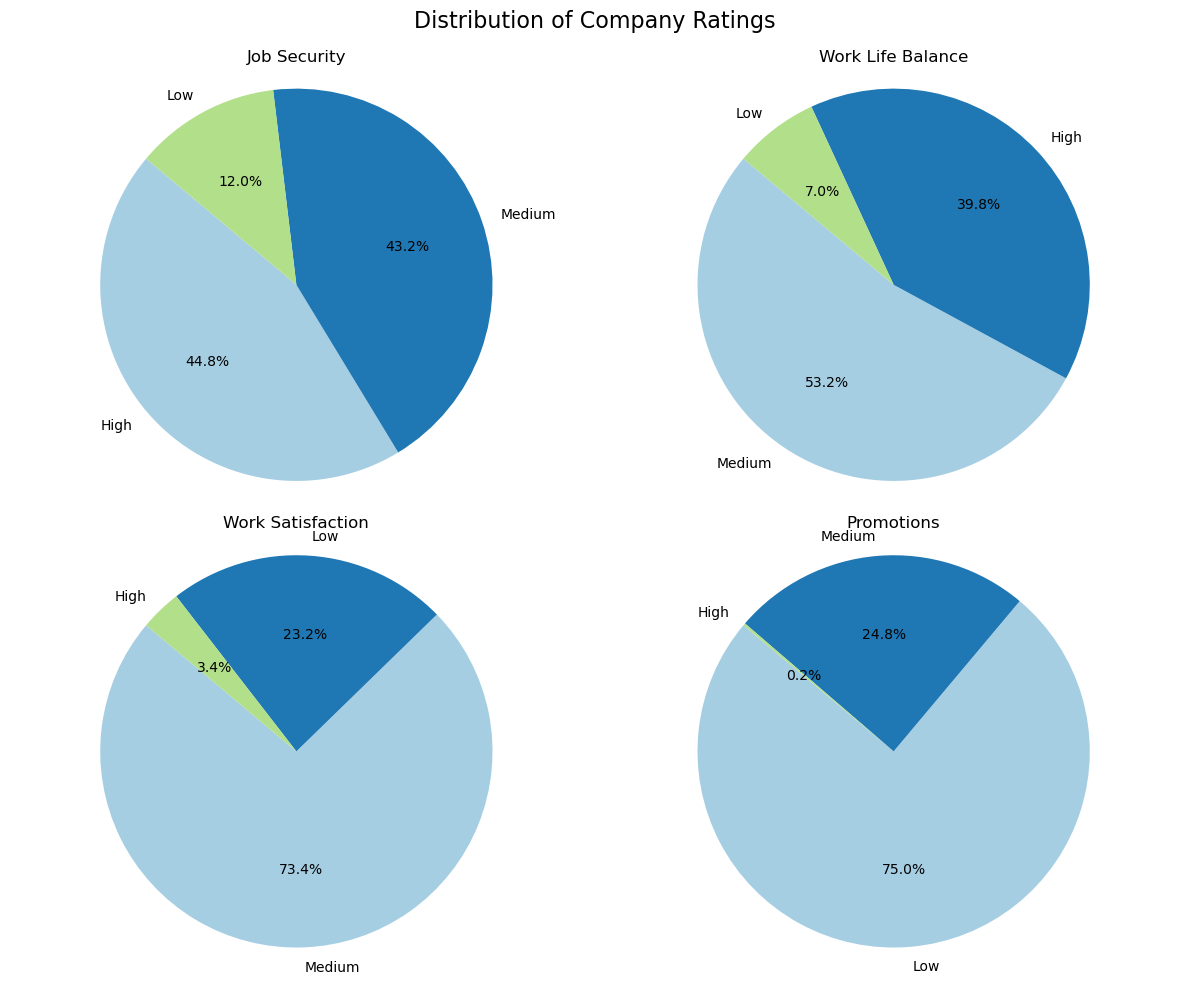

In [131]:
import matplotlib.pyplot as plt

# Categorical columns to visualize
rating_columns = ["Job Security", "Work Life Balance", "Work Satisfaction", "Promotions"]

# Define a clean color palette — replacing purple with navy
custom_colors = ['#a6cee3', '#1f78b4', '#b2df8a']  # soft sky, navy blue, mint green


# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot each pie chart
for i, col in enumerate(rating_columns):
    counts = ambition[col].value_counts()
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=custom_colors[:len(counts)]
    )
    axes[i].set_title(col)
    axes[i].axis('equal')

plt.suptitle("Distribution of Company Ratings", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()